In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense , Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import pathlib
data_dir="C:/Users/Manish/Desktop/eye"
print(data_dir)
data_dir=pathlib.Path(data_dir)

C:/Users/Manish/Desktop/eye


In [ ]:
dataset=os.listdir(data_dir)
print(dataset)

['blureye', 'clear eye', 'closed eyes', 'humanface', 'random']


C:\Users\Manish\Desktop\eye\blureye\image_100.jpg


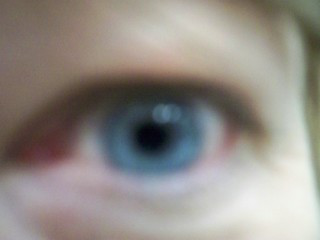

In [ ]:
blureye = list(data_dir.glob('blureye/*'))
print(blureye[0])
PIL.Image.open(str(blureye[0]))

C:\Users\Manish\Desktop\eye\clear eye\image_0.jpg


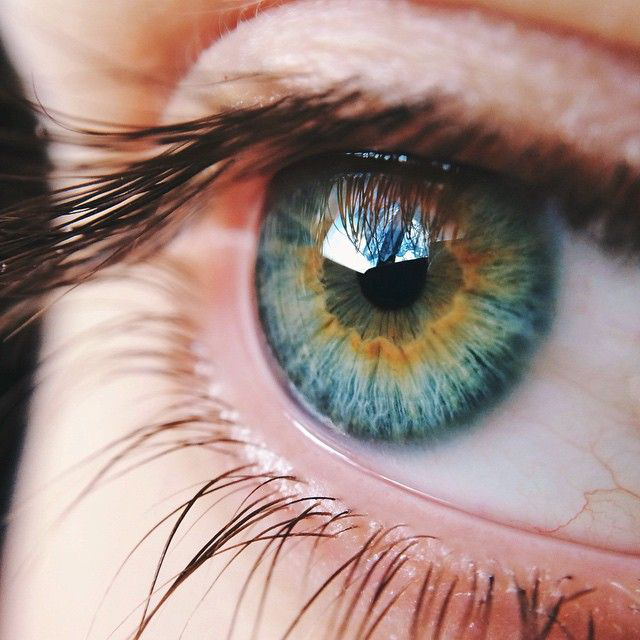

In [ ]:
cleareye = list(data_dir.glob('clear eye/*'))
print(cleareye[0])
PIL.Image.open(str(cleareye[0]))

C:\Users\Manish\Desktop\eye\closed eyes\image_150.jpg


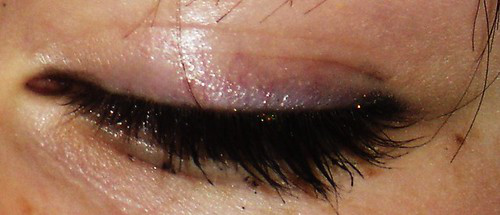

In [ ]:
closedeyes = list(data_dir.glob('closed eyes/*'))
print(closedeyes[0])
PIL.Image.open(str(closedeyes[0]))

C:\Users\Manish\Desktop\eye\humanface\image_200.jpeg


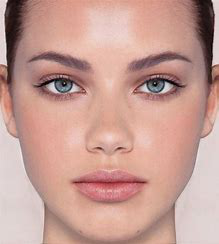

In [ ]:
human_face = list(data_dir.glob('humanface/*'))
print(human_face[0])
PIL.Image.open(str(human_face[0]))

C:\Users\Manish\Desktop\eye\random\image_250.jpeg


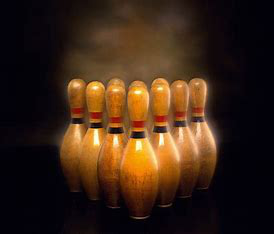

In [ ]:
random = list(data_dir.glob('random/*'))
print(random[0])
PIL.Image.open(str(random[0]))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.15,
subset="training",
seed=123,
label_mode='categorical',
image_size=(img_height,img_width),
batch_size=batch_size
)

Found 300 files belonging to 5 classes.
Using 255 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.15,
subset="validation",
seed=123,
label_mode='categorical',
image_size=(img_height,img_width),
batch_size=batch_size
)

Found 300 files belonging to 5 classes.
Using 45 files for validation.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['blureye', 'clear eye', 'closed eyes', 'humanface', 'random']


In [ ]:
resnet_model=Sequential()
pretrained_model=tf.keras.applications.ResNet50(include_top=False,
                 input_shape=(180,180,3),
                 pooling="avg",classes=5,
                 weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_12 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_14 (ModuleWr  (None, 5)                2565      
 apper)                                                          
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
__________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
history=resnet_model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 0.1300 - accuracy: 0.9529 - val_loss: 0.1874 - val_accuracy: 0.9333
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.0237 - accuracy: 0.9961 - val_loss: 0.2489 - val_accuracy: 0.9556
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.0201 - accuracy: 0.9922 - val_loss: 0.2815 - val_accuracy: 0.9556
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.0074 - accuracy: 0.9961 - val_loss: 0.1872 - val_accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1316 - val_accuracy: 0.9778
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1216 - val_accuracy: 0.9778
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 9.7699e-04 - accuracy: 1.0000 - val_loss: 0.1214 - val_accuracy: 0.9778
Epoch 8/10
8/8 [==============

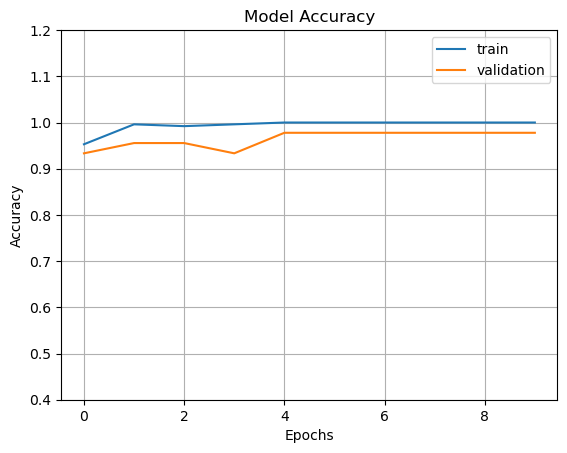

In [ ]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.2)
plt.grid()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train','validation'])
plt.show()

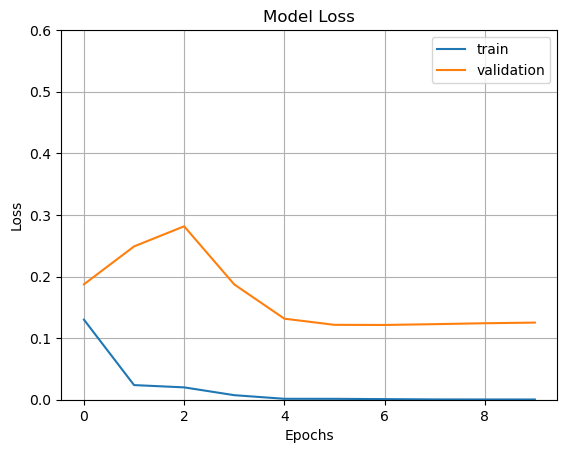

In [ ]:
fig2=plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=0.6)
plt.grid()
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train','validation'])
plt.show()

In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
image=cv2.imread(str(cleareye[0]))
image_resized=cv2.resize(image ,(img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 98ms/step
[[3.2263695e-05 9.9996769e-01 1.8764397e-10 5.9191665e-09 1.4275781e-09]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is :",output_class)

The predicted class is : clear eye


In [ ]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import os
os.getcwd()


'C:\\Users\\Manish'